#### **Import Libraries**

In [4]:
import os 
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from tqdm import tqdm
import numpy as np 
import random 
import math
from itertools import chain
from IPython.display import display, Markdown
import textwrap
import tiktoken
import csv
import time 
import pandas as pd 
import torch
from datasets import Dataset
from torch.utils.data import DataLoader
import transformers
from transformers import DataCollatorWithPadding
from llmft.train import EncoderTrainer, EarlyStopping
from llmft.metrics import compute_recall
from llmft.losses import FocalLoss
from llmft.utils import predict
import seaborn as sns 
import jax 
import jax.numpy as jnp 
import glob
import re

#### **Set Up Paths**

In [2]:
figures_folder = './../../../../instrumental_llms/figures/'

#### **Set Up Plotting**

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-v0_8-dark-palette')

from matplotlib import font_manager 
locations = './../../../styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

./../../../styles/Newsreader
/home/ubuntu/llmft/styles/Newsreader/static/Newsreader_9pt/Newsreader_9pt-Light.ttf


In [5]:
# Define the directory containing the .npy files
directory = './../../../toy-data/exp2/results/'  # Update this to the actual directory path

# Use glob to list all .npy files in the directory
file_pattern = directory + 'bert_8_2000_False_*.npy'
files = glob.glob(file_pattern)

# Create a dictionary to store numpy arrays based on the ending number
arrays_dict = {}

# Regular expression to extract the ending number from filenames
pattern = re.compile(r'bert_8_2000_False_\d+_(\d)\.npy')

for file in files:
    match = pattern.search(file)
    if match:
        ending_number = match.group(1)
        if ending_number not in arrays_dict:
            arrays_dict[ending_number] = []
        array = np.load(file)
        arrays_dict[ending_number].append(array)

# Example: Print the dictionary keys and lengths of corresponding lists
for key, value in arrays_dict.items():
    print(f"Ending number: {key}, Number of arrays: {len(value)}")

# Now arrays_dict contains lists of numpy arrays grouped by their ending number

Ending number: 1, Number of arrays: 12
Ending number: 3, Number of arrays: 12
Ending number: 5, Number of arrays: 12


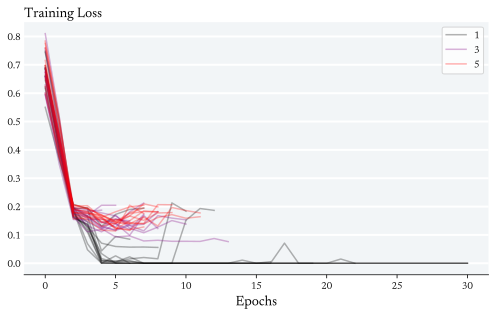

In [28]:
# Plot the bar chart
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))

# Set visibility of some spines
for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)

# Add text to the axes
ax.text(0., 1.02, s='Training Loss', transform=ax.transAxes, size=14)

# Set Y-axis tick parameters and grid
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
for key, color in zip(arrays_dict.keys(), ['black', 'purple', 'red']):
    for i, j in enumerate(arrays_dict[key]):
        if i == 0:
            plt.plot(j, color=color, alpha=0.3, label=key)
        else:
            plt.plot(j, color=color, alpha=0.3)
plt.xlabel('Epochs', size=14)
plt.legend()
plt.show()